In [16]:
# !pip install pandas --upgrade
# !pip install pandas-profiling -- upgrade
# !pip install pandas-profiling

# Titanic Dataset

The Titanic dataset is a commonly used dataset in the field of machine learning and data analysis. It contains information about passengers on the RMS Titanic, including various features such as age, gender, fare, and cabin class. The dataset is often utilized for classification tasks to predict whether a passenger survived the Titanic disaster based on the provided features.

### Column Descriptions

1. `survived`: Survival status of the passenger (0 = No, 1 = Yes).
2. `pclass`: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).
3. `sex`: Gender of the passenger.
4. `age`: Age of the passenger.
5. `sibsp`: Number of siblings/spouses aboard.
6. `parch`: Number of parents/children aboard.
7. `fare`: Fare paid by the passenger.
8. `embarked`: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).
9. `class`: Equivalent to `pclass`, but represented as a word.
10. `who`: Person type (man, woman, child).
11. `adult_male`: Boolean indicating if the passenger is an adult male.
12. `deck`: Deck where the cabin is located.
13. `embark_town`: Town where the passenger embarked.
14. `alive`: Survival status of the passenger (yes, no).
15. `alone`: Boolean indicating if the passenger is traveling alone.


## Importing

In [17]:
# Print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix

# from pandas_profiling import ProfileReport


In [19]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


## Import the data and First Look

In [20]:
titanic = sns.load_dataset('titanic')

In [21]:
titanic.shape
titanic.head()

(891, 15)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [22]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [23]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [24]:
# # Generate a profile report
# profile = ProfileReport(titanic, title="Pandas Profiling Report", explorative=True)

# # Display the report (you can also save it to a file using profile.to_file())
# profile.to_widgets()

## Data Cleaning

In [25]:
titanic.who.value_counts()
titanic.sex.value_counts()


man      537
woman    271
child     83
Name: who, dtype: int64

male      577
female    314
Name: sex, dtype: int64

In [26]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

### Drop Redundent columns

In [27]:
titanic.drop(columns = ['who', 'adult_male', 'deck', 'class','alive', 'embark_town',  'alone', 'deck'], inplace=True)

In [28]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Rename Columns

In [29]:
column_rename = {'sex': 'gender','sibsp': 'siblings','parch': 'parents_child'}
titanic.rename(columns=column_rename, inplace=True)

titanic.head()


,survived,pclass,gender,age,siblings,parents_child,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Other Preprocessing

In [30]:
titanic.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

### Missing Values

In [31]:
titanic.isna().sum()

survived           0
pclass             0
gender             0
age              177
siblings           0
parents_child      0
fare               0
embarked           2
dtype: int64

<Figure size 500x400 with 0 Axes>

<Axes: xlabel='age', ylabel='Count'>

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Bell Curve for Age Distribution')

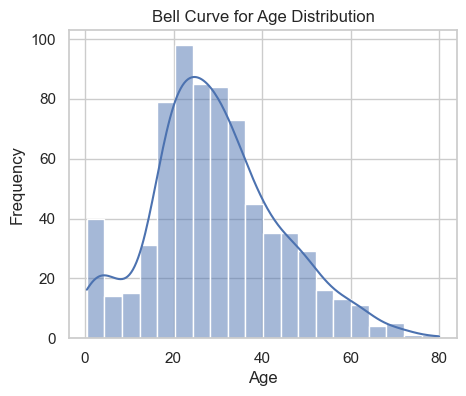

,survived,pclass,age,siblings,parents_child,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
# Plot settings
plt.figure(figsize=(5,4))
sns.set(style="whitegrid")

# Plot the bell curve
sns.histplot(data=titanic, x='age', kde=True)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Bell Curve for Age Distribution')

# Show the plot
plt.show()

titanic.describe()

In [33]:
# Fill missing values
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)
titanic['age'].fillna(titanic['age'].median(), inplace=True)

In [34]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   survived       891 non-null    int64  
 1   pclass         891 non-null    int64  
 2   gender         891 non-null    object 
 3   age            891 non-null    float64
 4   siblings       891 non-null    int64  
 5   parents_child  891 non-null    int64  
 6   fare           891 non-null    float64
 7   embarked       891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [35]:
# titanic.quantile(np.arange(0,1,0.05))

In [36]:
np.arange(0,1,0.05)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [37]:
# titanic.quantile([0.1,0.99])


### Outlier Treatment

<Figure size 800x500 with 0 Axes>

<Axes: xlabel='fare', ylabel='Count'>

Text(0.5, 0, 'Fare')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Bell Curve for Fare Distribution')

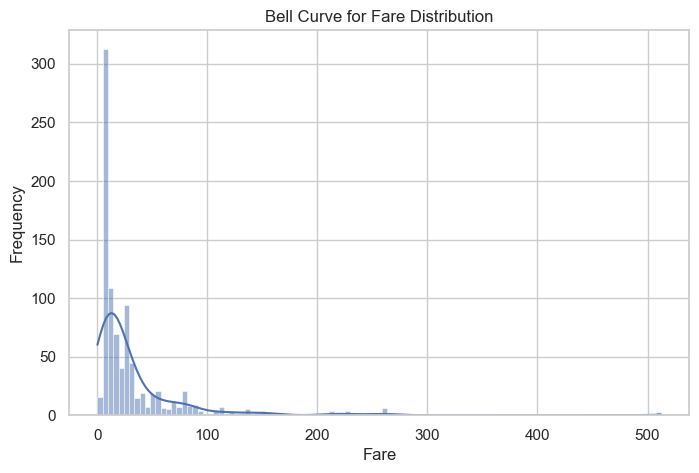

In [38]:
# Plot settings
plt.figure(figsize=(8,5))
sns.set(style="whitegrid")

# Plot the bell curve for Fare
sns.histplot(data=titanic, x='fare', kde=True)

# Add labels and title for Fare plot
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Bell Curve for Fare Distribution')

# Show the Fare plot
plt.show()

In [39]:
# titanic.fare = titanic.fare.clip(lower=titanic.fare.quantile(0.01), upper=titanic.fare.quantile(0.99))

In [40]:
# titanic.quantile([0.1,0.99])

In [41]:
# Get numeric columns
numeric_columns = titanic.select_dtypes(include=[float, int]).columns

# Loop through numeric columns and clip values
for column in numeric_columns:
    lower_bound = titanic[column].quantile(0.01)
    upper_bound = titanic[column].quantile(0.99)
    titanic[column] = titanic[column].clip(lower=lower_bound, upper=upper_bound)


In [42]:
titanic.head()

,survived,pclass,gender,age,siblings,parents_child,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [43]:
object_columns = titanic.select_dtypes(include=[object]).columns
# Loop through object columns and encode them
for column in object_columns:
    titanic[column] = pd.Categorical(titanic[column]).codes

In [44]:
titanic.head()

,survived,pclass,gender,age,siblings,parents_child,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [45]:
titanic.isna().sum()

survived         0
pclass           0
gender           0
age              0
siblings         0
parents_child    0
fare             0
embarked         0
dtype: int64

In [46]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   survived       891 non-null    int64  
 1   pclass         891 non-null    int64  
 2   gender         891 non-null    int8   
 3   age            891 non-null    float64
 4   siblings       891 non-null    int64  
 5   parents_child  891 non-null    int64  
 6   fare           891 non-null    float64
 7   embarked       891 non-null    int8   
dtypes: float64(2), int64(4), int8(2)
memory usage: 43.6 KB


# EDA

In [47]:
!pip install ydata-profiling

  Obtaining dependency information for ydata-profiling from https://files.pythonhosted.org/packages/09/98/5a5fbfd48bf23acd3ceed5114d073b877965816304078151fefbf86d8458/ydata_profiling-4.5.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pydantic<2,>=1.8.1 from https://files.pythonhosted.org/packages/e1/6b/6a68bd4f0837accdb78cf07e8590f2c9f00334003681b94d4957424248f2/pydantic-1.10.12-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/150.6 kB ? eta -:--:--
     ------------------------------- ------ 122.9/150.6 kB 3.6 MB/s eta 0:00:01
     -------------------------------------- 150.6/150.6 kB 3.0 MB/s eta 0:00:00
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
     ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
     - -------------------------------------- 0.5/14.6 MB 14.2 MB/s eta 0:00:01
     --- ------------------------------------ 1.3/14.6 MB 16.8 MB/s eta 0:00:01
     ------ ---------------------------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Furqan970\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [48]:
from ydata_profiling import ProfileReport

ModuleNotFoundError: No module named 'ydata_profiling'

In [49]:
profile = ProfileReport(titanic, title='Pandas Profiling Report', explorative=True)
# Generate the report (this might take some time for larger datasets)
profile.to_file("report.html")

NameError: name 'ProfileReport' is not defined

In [50]:
from IPython.display import display, HTML

# Read the content of the HTML report file
with open('report.html', 'r') as file:
    html_content = file.read()

# Display the HTML content in the notebook
display(HTML(html_content))

Number of variables,8
Number of observations,891
Missing cells,0
Missing cells (%),0.0%
Duplicate rows,60
Duplicate rows (%),6.7%
Total size in memory,43.6 KiB
Average record size in memory,50.1 B
Categorical,5
Numeric,3
Dataset has 60 (6.7%) duplicate rows,Duplicates


## Modeling 

LogisticRegression(max_iter=10000)

Accuracy: 0.8268156424581006
Confusion Matrix:
[[98  7]
 [24 50]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       105
           1       0.88      0.68      0.76        74

    accuracy                           0.83       179
   macro avg       0.84      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179



<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 33.249999999999986, 'Predicted')

Text(67.25, 0.5, 'Actual')

Text(0.5, 1.0, 'Confusion Matrix Heatmap')

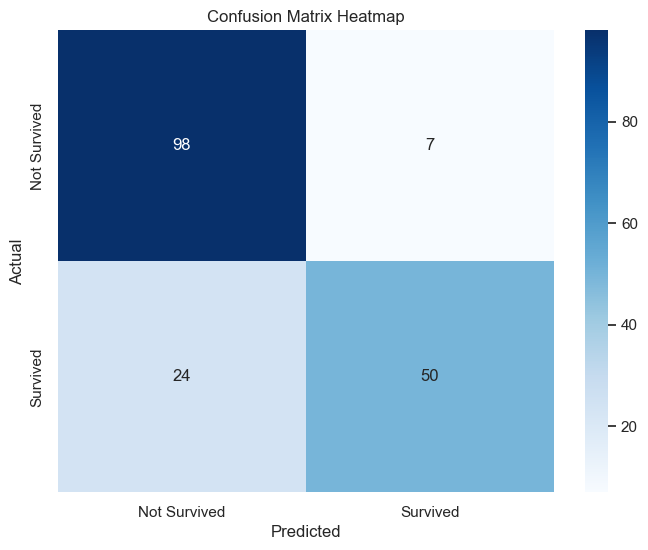

<Figure size 640x480 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic')

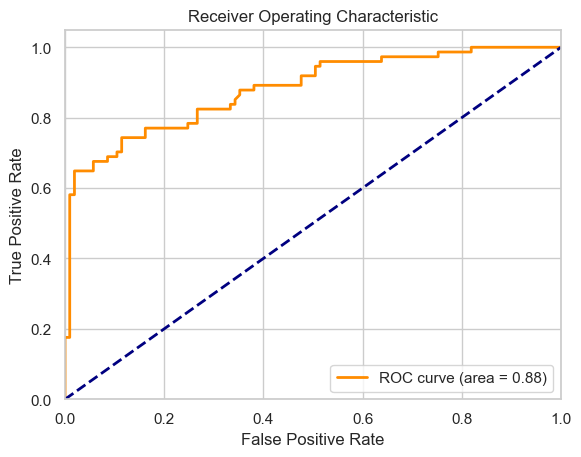

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the target column and categorical columns to encode
target_column = 'survived'
categorical_columns = ['pclass', 'gender', 'age', 'siblings', 'parents_child', 'fare', 'embarked']

# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(titanic, columns=categorical_columns, drop_first=True)

# Split data into features (X) and the target variable (y)
X = df_encoded.drop(target_column, axis=1)
y = df_encoded[target_column]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=10000)  # You can adjust max_iter based on your dataset size
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

# Create a confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap - Titanic Dataset')

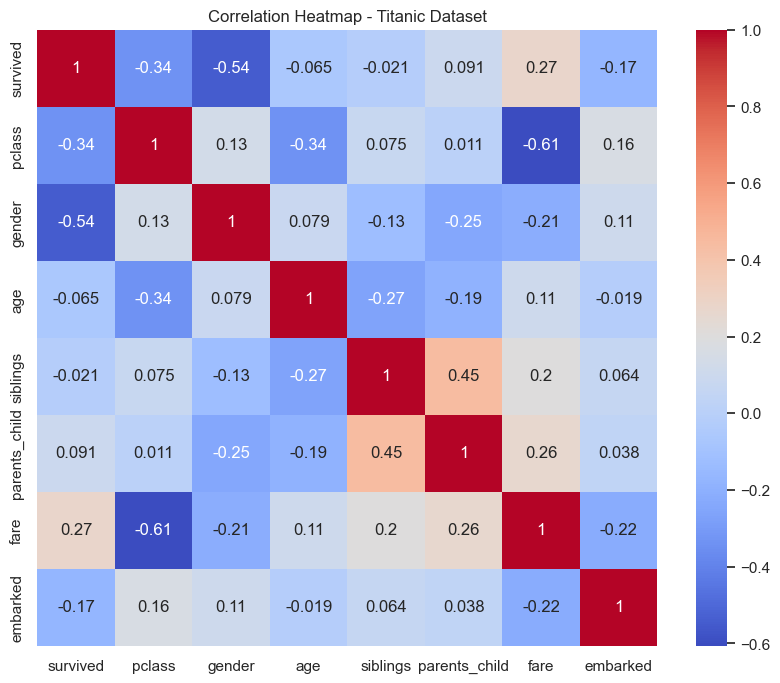

In [52]:
# Calculate the correlation matrix
corr_matrix = titanic.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Titanic Dataset')
plt.show()

In [53]:
!pip install graphviz

In [54]:
import graphviz
from sklearn import tree
from sklearn import metrics

In [55]:
mytree = tree.DecisionTreeClassifier(min_samples_leaf=50,min_samples_split=200)

In [57]:
mytree = tree.DecisionTreeClassifier(random_state=99, class_weight='balanced')
mytree

DecisionTreeClassifier(class_weight='balanced', random_state=99)

In [58]:
my_max_depth = [2,3,4,5,10] #5
my_criterion = ['gini','entropy']#2
my_min_samples_leaf = [2,5,10,15,20,25] #6
my_min_samples_split = [2,5,10,15,50,100] #6

In [59]:
#total number of models u will be building
len(my_max_depth)*len(my_criterion)*len(my_min_samples_leaf)*len(my_min_samples_split)

360

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
#Building the model
#Cross-Validation tells how well a model performs on a dataset using multiple samples of tthe train data
grid = GridSearchCV(estimator = mytree, cv=5, scoring = "recall",param_grid = dict(max_depth = my_max_depth, criterion = my_criterion, min_samples_leaf = my_min_samples_leaf,min_samples_split = my_min_samples_split))

In [64]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=99),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 10],
                         'min_samples_leaf': [2, 5, 10, 15, 20, 25],
                         'min_samples_split': [2, 5, 10, 15, 50, 100]},
             scoring='recall')

In [65]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 50}

In [66]:
#Best parameters for the model
results = pd.DataFrame(grid.cv_results_)
results.to_csv("results.csv")

In [67]:
res = pd.read_csv("results.csv")
res

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0,0.012970,0.001793,0.007765,0.000947,gini,2,2,2,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.629630,0.648148,0.716981,0.754717,0.648148,0.679525,0.047990,65
1,1,0.011279,0.000337,0.008440,0.001201,gini,2,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.629630,0.648148,0.716981,0.754717,0.648148,0.679525,0.047990,65
2,2,0.011206,0.000453,0.007568,0.000490,gini,2,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.629630,0.648148,0.716981,0.754717,0.648148,0.679525,0.047990,65
3,3,0.012081,0.000441,0.008072,0.000474,gini,2,2,15,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.629630,0.648148,0.716981,0.754717,0.648148,0.679525,0.047990,65
4,4,0.011335,0.000977,0.008203,0.000896,gini,2,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.629630,0.648148,0.716981,0.754717,0.648148,0.679525,0.047990,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,355,0.014474,0.000650,0.008046,0.000623,entropy,10,25,5,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.537037,0.574074,0.641509,0.660377,0.592593,0.601118,0.044841,227
356,356,0.014157,0.000487,0.007260,0.000625,entropy,10,25,10,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.537037,0.574074,0.641509,0.660377,0.592593,0.601118,0.044841,227
357,357,0.014023,0.000536,0.007658,0.000375,entropy,10,25,15,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.537037,0.574074,0.641509,0.660377,0.592593,0.601118,0.044841,227
358,358,0.013769,0.000171,0.007910,0.000673,entropy,10,25,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.537037,0.574074,0.641509,0.660377,0.592593,0.601118,0.044841,227


In [74]:
np.round(grid.best_score_, 2)*100

74.0

In [75]:
np.round(grid.best_score_, 3)*100 #best score is mean test score

73.5

In [77]:
predicted = grid.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       105
           1       0.79      0.81      0.80        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



In [80]:
predicted

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0], dtype=int64)

Note : grid automatically remembers the best parameter settings

# How to optimize the recall better

# Predict the Probability of the Classes

In [81]:
predicted_prob = grid.predict_proba(X_test)
np.round(predicted_prob,3)

array([[0.791, 0.209],
       [0.791, 0.209],
       [0.012, 0.988],
       [0.644, 0.356],
       [0.411, 0.589],
       [0.901, 0.099],
       [0.555, 0.445],
       [0.012, 0.988],
       [0.411, 0.589],
       [0.057, 0.943],
       [0.287, 0.713],
       [0.791, 0.209],
       [0.42 , 0.58 ],
       [0.   , 1.   ],
       [0.012, 0.988],
       [0.901, 0.099],
       [0.774, 0.226],
       [1.   , 0.   ],
       [0.791, 0.209],
       [0.791, 0.209],
       [0.057, 0.943],
       [0.791, 0.209],
       [1.   , 0.   ],
       [0.791, 0.209],
       [0.879, 0.121],
       [0.791, 0.209],
       [0.791, 0.209],
       [0.731, 0.269],
       [0.901, 0.099],
       [0.411, 0.589],
       [0.901, 0.099],
       [0.791, 0.209],
       [0.25 , 0.75 ],
       [0.25 , 0.75 ],
       [0.791, 0.209],
       [0.791, 0.209],
       [0.624, 0.376],
       [0.   , 1.   ],
       [0.791, 0.209],
       [0.644, 0.356],
       [0.791, 0.209],
       [0.25 , 0.75 ],
       [0.376, 0.624],
       [0.7

# Threshold Optimization

In [82]:
predicted_prob = grid.predict_proba(X_test)
testcase = np.round(predicted_prob[0], 3)
testcase

array([0.791, 0.209])

In [83]:
predicted_prob[0,1] #0th row 1st column

0.20902440790903162

In [84]:
testcase_prediction = testcase[1] >= 0.25
testcase_prediction

False

In [85]:
#Apply new threshold for optimizing Precision and Recall
new_y_test = predicted_prob[:,1] >= 0.25 #if the person has even 25% chance of surviving, call him a survivor

In [87]:
predicted_prob

array([[0.79097559, 0.20902441],
       [0.79097559, 0.20902441],
       [0.01241891, 0.98758109],
       [0.64423077, 0.35576923],
       [0.41138711, 0.58861289],
       [0.90053763, 0.09946237],
       [0.55505077, 0.44494923],
       [0.01241891, 0.98758109],
       [0.41138711, 0.58861289],
       [0.05692438, 0.94307562],
       [0.2869379 , 0.7130621 ],
       [0.79097559, 0.20902441],
       [0.4200627 , 0.5799373 ],
       [0.        , 1.        ],
       [0.01241891, 0.98758109],
       [0.90053763, 0.09946237],
       [0.77377717, 0.22622283],
       [1.        , 0.        ],
       [0.79097559, 0.20902441],
       [0.79097559, 0.20902441],
       [0.05692438, 0.94307562],
       [0.79097559, 0.20902441],
       [1.        , 0.        ],
       [0.79097559, 0.20902441],
       [0.87868852, 0.12131148],
       [0.79097559, 0.20902441],
       [0.79097559, 0.20902441],
       [0.73090909, 0.26909091],
       [0.90053763, 0.09946237],
       [0.41138711, 0.58861289],
       [0.

In [89]:
print(metrics.classification_report(y_test, new_y_test))

              precision    recall  f1-score   support

           0       0.87      0.69      0.77       105
           1       0.66      0.85      0.74        74

    accuracy                           0.75       179
   macro avg       0.76      0.77      0.75       179
weighted avg       0.78      0.75      0.76       179



Bias= Model is accurate;
Variance= Model is consistent

low bias and low variance = ideal, neither overfitting nor underfitting

low bias and high variance = overfitting

high bias and low variance = underfitting

high bias and high variance = Bogus

Ensemble models = not one model but a grp of models

Ensemble models is broken down into 3 main categories namely = bagging, boosting and stacking

Bagging = majority vote

Boosting = from same data we are given separate sample of the data; boosting each others performance

Stacking = higher performance models; may have random forest, decision tree, logistic regression stacked on top of each other

In [ ]:
my_estimators = [10,100,1000] #3 no of trees in the forest

# Decision Tree Random Forest

In [90]:
my_estimators = [10,100,1000] #3 no of trees in the forest
my_max_depth = [5,10,15] #3
my_criterion = ['gini', 'entropy'] #2
my_min_samples_leaf = [2,5,10,15] #4
my_min_samples_split = [2,5,10] #3

In [93]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(class_weight = 'balanced', random_state = 23)

In [94]:
#importing grid search
from sklearn.model_selection import GridSearchCV

In [95]:
#Start time
import time
start = time.time()

#Building the model

#Cross-Validation tells how well a model performs on a dataset while using multiple samples of train data
grid_rf = GridSearchCV(estimator = forest, cv = 4,scoring = 'recall', param_grid = dict(max_depth= my_max_depth, criterion = my_criterion, min_samples_leaf = my_min_samples_leaf, min_samples_split = my_min_samples_split, n_estimators = my_estimators))
grid_rf.fit(X_train,y_train)
end = time.time()

GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=23),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15],
                         'min_samples_leaf': [2, 5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 100, 1000]},
             scoring='recall')